##### Import relevant libraries and packages

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_theme(style='white', palette='rainbow', font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

## Data quality check / cleaning / preparation

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### JC 之后改heading
*By Julia

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [ ]:
data = pd.read_csv("data/student-mat.csv")
display(data.head())
display(data.shape)

#check missing data -> There are no missing data
print(f"Length: {len(data)}")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns}")
#data.isnull().any()

In [ ]:
### Age & Gender Distribution and its effect on grade outcome

### Marking Final Grade as Categorical Value & Viewing their Count
data['finalGrade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
data['finalGrade'].replace(['Fail', 'Pass'], [0, 1], inplace=True)
sns.countplot(x='finalGrade', data=data)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

age_pl = sns.countplot(data=data, x='age', hue='sex', ax=axes[0])
age_pl.axes.set_title('Number of students in different age groups', fontsize=12)
age_pl.set_xlabel("Age", fontsize=8)
age_pl.set_ylabel("Count", fontsize=8)

sns.boxenplot(x='finalGrade', y='age', data=data, ax=axes[1])
plt.show()

In [ ]:
#Whether there's a gender difference in grade distribution in G1 G2 AND G3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1 = sns.boxplot(data=data, x='sex', y='G1', ax=axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data=data, x='sex', y='G2', ax=axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data=data, x='sex', y='G3', ax=axes[2])
ax3.set_title('G3')
plt.show()

In [ ]:
age_data = data.groupby('age')['finalGrade'].agg([('pass_rate', 'mean'), ('nobs', 'count')]).reset_index(drop=False)
sns.lineplot(x=age_data.age, y=age_data['pass_rate'])
plt.xlabel('age')


In [ ]:
g = sns.catplot(
    data=data, x="sex", y="finalGrade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

In [ ]:
#Whether geography affects grade outcome 
add_plt = sns.countplot(data=data, x='address', hue="finalGrade")
add_plt.axes.set_title('Urban and Rural students', fontsize=12)
add_plt.set_xlabel('Address', fontsize=12)
add_plt.set_ylabel('Count', fontsize=12)

Text(0.5, 0.98, 'Educated families result in Potentail higher grades in G1 & G2')

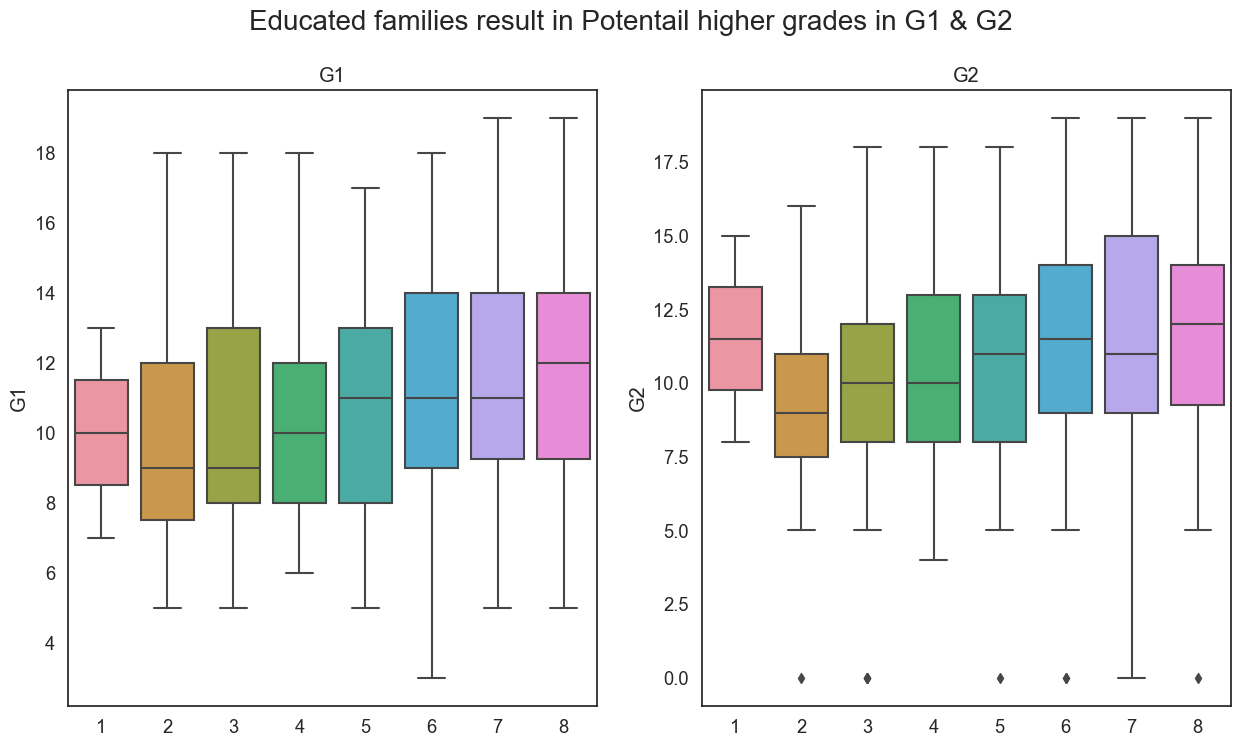

In [88]:
### Parents Education and its potential relationship with educational outcome
#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
#Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

family_ed = data['Fedu'] + data['Medu']
# add_plt = sns.countplot(data = data, x =family_ed, hue = "Final Grade")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.boxplot(data=data, x=family_ed, y='G1', ax=axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data=data, x=family_ed, y='G2', ax=axes[1])
ax2.set_title('G2')

fig.suptitle('Educated families result in Potentail higher grades in G1 & G2', fontsize=20)

### Data cleaning and Preparation
*By Victoria Shi*

From the data quality check, we realized that:

1. While there are no missing values, the data set consists of many categorical variables, so we would need to either encode these variables, dummify them, or convert the data type of these columns from object to numeric.
2. For columns with a yes-no response, we implement a binary mapping of 'yes' to 1 and 'no' to 0.
3. For categorical columns with two unique values, we converted them to 0/1 binary variables, as the choice of 0/1 would not change the result.
4. For columns of categorical variables with more than 2 unique values, we could not map them to numerical values (i.e., mapping distinct values to different integer values) as it would introduce bias due to assuming one value is superior to the other. So instead, we convert them to dummy variables as new predictors.
5. There

The code below implements the above cleaning.

In [194]:
# read in data
data = pd.read_csv("data/student-mat.csv")

In [203]:
print(f"numerical columns \n{list(data.select_dtypes(include=['int64', 'float64']))}\n")
print(f"categorical columns: \n{list(data.select_dtypes(include=['object']))}")

numerical columns 
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

categorical columns: 
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [244]:
# summary statistics (min and max) of numerical columns -- only want a rough idea of the general range of values instead of the detailed distributions, so min and max would suffice, instead of the mean or standard deviation

data.describe().loc[['min', 'max']].astype(int).T

,min,max
age,15,22
Medu,0,4
Fedu,0,4
traveltime,1,4
studytime,1,4
failures,0,3
famrel,1,5
freetime,1,5
goout,1,5
Dalc,1,5


In [243]:
# categorical columns
cat_columns = data.select_dtypes(include=['object']).columns

columns = []

# use loop comprehension to  store the column names and the number of unique values
[columns.append([col, data[col].nunique()]) for col in cat_columns]

tally_cat_cols = pd.DataFrame(columns, columns=['Column Name', 'Number of Unique Values'])
tally_cat_cols

,Column Name,Number of Unique Values
0,school,2
1,sex,2
2,address,2
3,famsize,2
4,Pstatus,2
5,Mjob,5
6,Fjob,5
7,reason,4
8,guardian,3
9,schoolsup,2


In [113]:
######---------------Converting yes-no variables to binary variables----------------#########
# Create a dictionary for binary mapping
binary_mapping = {'yes': 1, 'no': 0}

# Find all columns in the data frame that have 'yes' or 'no' as the response
yes_no_columns = [col for col in data.columns if data[col].isin(['yes', 'no']).any()]

# Apply binary mapping to all columns found in the previous step using a lambda function and pandas' apply method
data[yes_no_columns] = data[yes_no_columns].apply(lambda x: x.map(binary_mapping))

In [252]:
######---------------Transforming predictors with 2 unique values----------------#########
# map categorical variables in data to 0 or 1 if the column has two unique values
#  map the values in the 'school' column to 0 or 1
data['school'] = data['school'].map({'GP': 0, 'MS': 1})
# map the values in the 'sex' column to 0 or 1
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
# map the values in the 'famsize' column to 0 or 1
# binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3
data['famsize'] = data['famsize'].map({'LE3': 0, 'GT3': 1})
# map the values in the 'address' column to 0 or 1
# binary: 'U' - urban or 'R' - rural
data['address'] = data['address'].map({'R': 0, 'U': 1})
# map the values in the 'Pstatus' column to 0 or 1
# parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
data['Pstatus'] = data['Pstatus'].map({'A': 0, 'T': 1})
# data.shape

In [253]:
######---------------Creating new predictors----------------#########
# Create dummy variables for the 'col' column
dummies = pd.get_dummies(data.loc[:, ['Mjob', 'Fjob', 'reason', 'guardian']], prefix = ['Mjob', 'Fjob', 'reason', 'guardian'])

# # Concatenate the original data frame with the dummy variables
data = pd.concat([data, dummies], axis=1)

# # Drop the original 'col' column
# combine Dalc and Walc into alc
data.loc[:, 'Alc'] = data['Dalc'] + data['Walc']

# drop Dalc and Walc
data = data.drop(columns=['Dalc', 'Walc'])

KeyError: 'Dalc'

In [254]:
# preview of dataset for training
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,1,0,4,4,at_home,teacher,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,1,1,1,1,at_home,other,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,0,1,1,1,at_home,other,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,1,1,4,2,health,services,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,1,1,3,3,other,other,...,1,0,0,0,1,0,0,1,0,0


In [251]:
# data.head(3)
data.dtypes

school               object
sex                  object
age                   int64
address              object
famsize              object
Pstatus              object
Medu                  int64
Fedu                  int64
Mjob                 object
Fjob                 object
reason               object
guardian             object
traveltime            int64
studytime             int64
failures              int64
schoolsup            object
famsup               object
paid                 object
activities           object
nursery              object
higher               object
internet             object
romantic             object
famrel                int64
freetime              int64
goout                 int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
Mjob_at_home          uint8
Mjob_health           uint8
Mjob_other            uint8
Mjob_services         uint8
Mjob_teacher        

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.